In [1]:
from imu.raw_dataset import IMUHumanEventDatabase

# - Data processing
import numpy as np

# - Plotting and config
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.6, 3.6]
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.size"] = 12

# - Import modules
from rockpool.devices.xylo.imu.preprocessing import Quantizer, JSVD, SubSpace

# Get the data

In [2]:
imu_db = IMUHumanEventDatabase(device_id="00")
train_set = imu_db.train_set
val_set = imu_db.val_set
test_set = imu_db.test_set

## Plot some raw samples

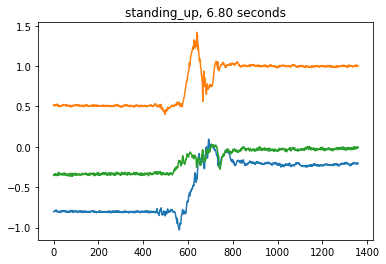

In [3]:
data, label, duration = train_set[0]
reverse_map = {v:k for k,v in train_set.label_map.items()}
plt.figure()
plt.plot(data)
plt.title(f"{reverse_map[label]}, {duration:.2f} seconds")
plt.show()

In [4]:
data.shape

(1360, 3)

## Step 1 : Quantize the data

Scale is obtained by investigating the dataset statistics. The maximum amplitude = 1.0 using scale factor=`0.49`

In [9]:
num_bits_in = 16
quantizer = Quantizer(shape=3, scale=0.49, num_bits=num_bits_in)

In [10]:
data_quantized, _, _ = quantizer(data)

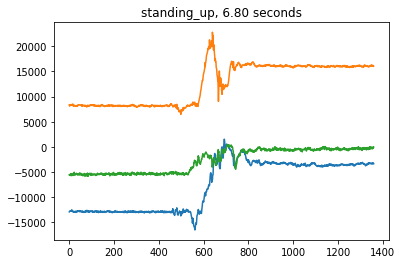

In [11]:
plt.figure()
plt.plot(data_quantized[0])
plt.title(f"{reverse_map[label]}, {duration:.2f} seconds")
plt.show()

## Step 2 : Subspace Estimation

In [12]:
# sampling rate of IMU sensors
fs = int(1/imu_db.dt)

# how much time averaging we would like to have
avg_window_duration = 50e-3 # in milli-sec
avg_window_len = int(avg_window_duration *fs )

# closest bitshift size for averaging filter implementation
avg_bitshift = int(np.log2(avg_window_len) + 1)

# number of bits devoted to storing the multiplication
num_bits_multiplier = 2*num_bits_in

# bits devoted to the implementation of high-prec filter
bits_highprec_filter = num_bits_multiplier + avg_bitshift

subspace = SubSpace(
    num_bits_in = num_bits_in,
    num_bits_multiplier=num_bits_multiplier,
    num_bits_highprec_filter=bits_highprec_filter,
    num_avg_bitshift=avg_bitshift,
)

In [13]:
C_list, _, _ = subspace(data_quantized.T)

ValueError: The input IMU signal should be a 2D signal of dimension 3 x T.

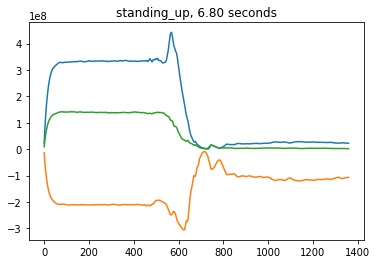

In [ ]:
plt.figure()
plt.plot(C_list[:, :, 0])
plt.title(f"{reverse_label_map[label]}, {duration:.2f} seconds")
plt.show()

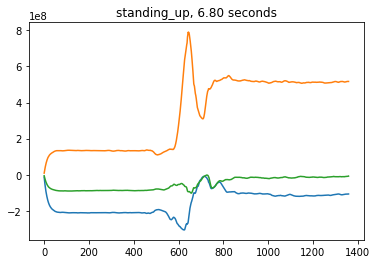

In [ ]:
plt.figure()
plt.plot(C_list[:, :, 1])
plt.title(f"{reverse_label_map[label]}, {duration:.2f} seconds")
plt.show()

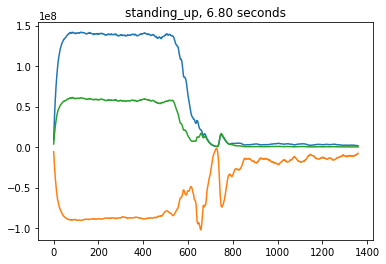

In [ ]:
plt.figure()
plt.plot(C_list[:, :, 2])
plt.title(f"{reverse_label_map[label]}, {duration:.2f} seconds")
plt.show()

## Step 3 : JSVD

In [ ]:
jsvd = JSVD(
    num_angles=64, 
    num_bits_lookup=16,
    num_bits_covariance=32,
    num_bits_rotation=32,
    nround=4,
)

WARNING    /home/ugurcan/SynSense Dropbox/Ugurcan Cakal/repos/rockpool/rockpool/devices/xylo/imu/preprocessing/lookup.py:62: RuntimeWarning: divide by zero encountered in divide
  self.cot2_vals = 1 / np.tan(2 * self.angles_radian)
 [py.warnings]


In [ ]:
# jsvd()